In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight']  = 'bold'
plt.style.use('seaborn-whitegrid')

In [2]:
path = '../DATA/'
df = pd.read_csv(path + 'insurance.csv')
print('\nNumber of rows and columns in the data set: ', df.shape)
print('')

df.head()


Number of rows and columns in the data set:  (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Text(0.5, 1.0, 'Charge vs BMI')

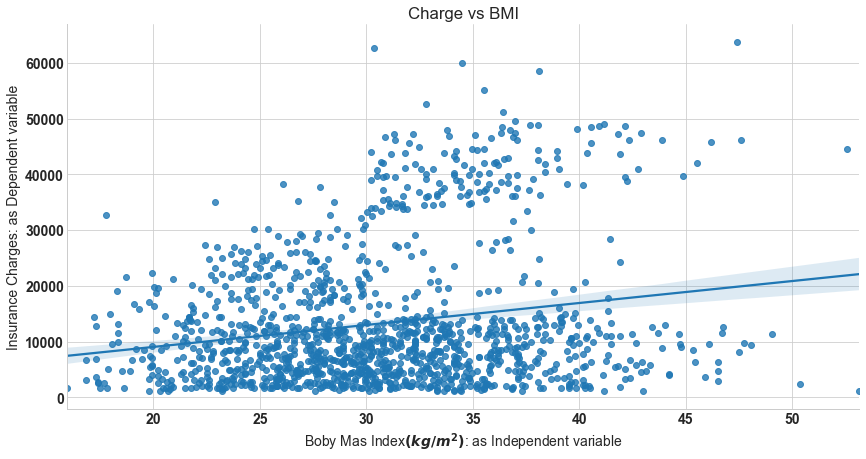

In [3]:
sns.lmplot(x = 'bmi', y = 'charges', data = df, aspect = 2, height = 6)
plt.xlabel('Boby Mas Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge vs BMI')

#  EDA

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Check for missing value

Text(0.5, 1.0, 'Missing value in the dataset')

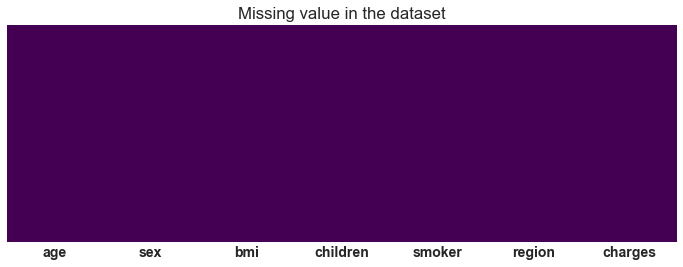

In [5]:
plt.figure(figsize = (12,4))
sns.heatmap(df.isnull(), cbar = False, cmap='viridis', yticklabels = False)
plt.title('Missing value in the dataset')

<AxesSubplot:>

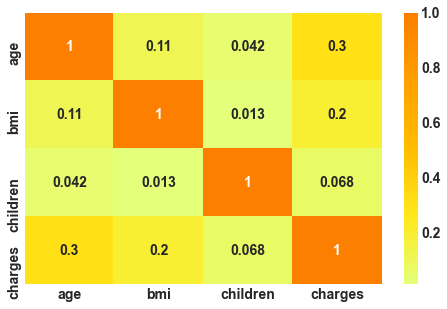

In [6]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot = True)

C:\Users\darry\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\darry\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution')

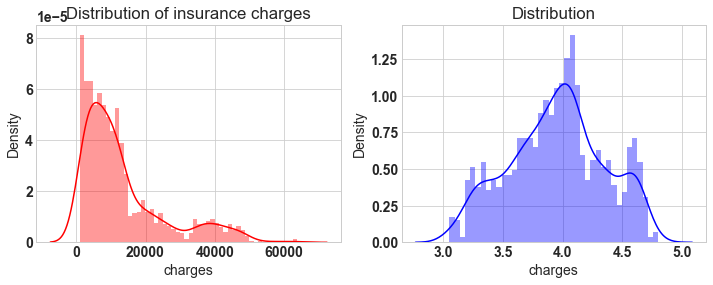

In [7]:
f = plt.figure(figsize= (12, 4))

ax = f.add_subplot(121)
sns.distplot(df['charges'], bins = 50, color = 'r', ax = ax)
ax.set_title('Distribution of insurance charges')

ax = f.add_subplot(122)
sns.distplot(np.log10(df['charges']), bins = 40, color = 'b', ax = ax)
ax.set_title('Distribution')

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
# X = np.array(df[['age', 'charges']]).reshape(-1,1)
X = df[['age', 'bmi', 'children']]
y = df['charges']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

In [12]:
reg.score(X_train, y_train)

0.11104481823374102

In [13]:
reg.score(X_test, y_test)

0.13800596455190495

Violin Plot

Text(0.5, 1.0, 'Violin plot of Charges vs smoker')

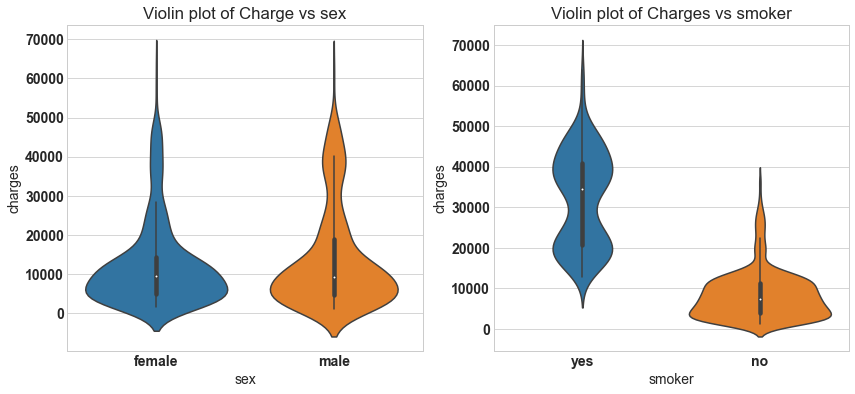

In [14]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(
    x = 'sex',
    y = 'charges',
    data = df,
    pallete = 'magma', 
    ax = ax)
ax.set_title('Violin plot of Charge vs sex')

ax = f.add_subplot(122)
sns.violinplot(
    x = 'smoker', 
    y = 'charges', 
    data = df, 
    pallete = 'magma', 
    ax = ax)
ax.set_title('Violin plot of Charges vs smoker')

Box Plot of charges vs children

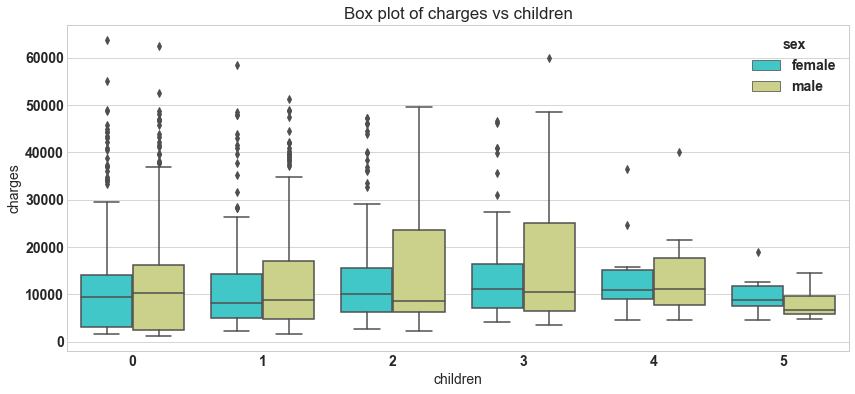

In [15]:
plt.figure(figsize = (14,6))
sns.boxplot(x = 'children', y = 'charges', hue = 'sex', data = df, palette = 'rainbow')
plt.title('Box plot of charges vs children');

In [16]:
df.groupby('children').agg(['mean', 'min', 'max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


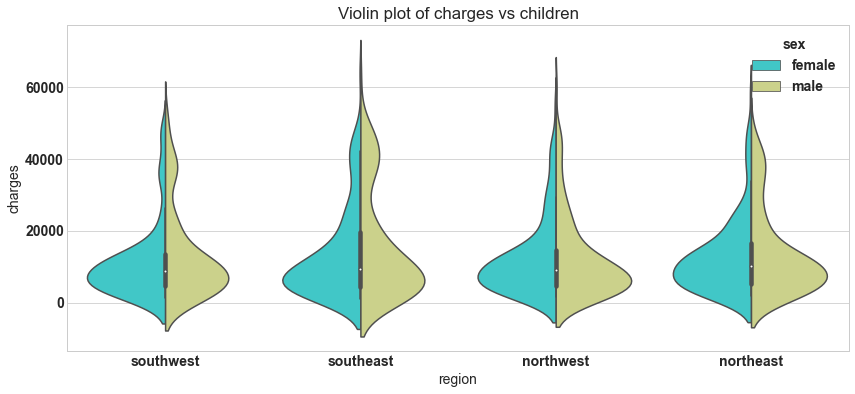

In [17]:
plt.figure(figsize = (14,6))
sns.violinplot(x = 'region', y = 'charges', hue = 'sex', data = df, palette = 'rainbow', split = True)
plt.title('Violin plot of charges vs children');

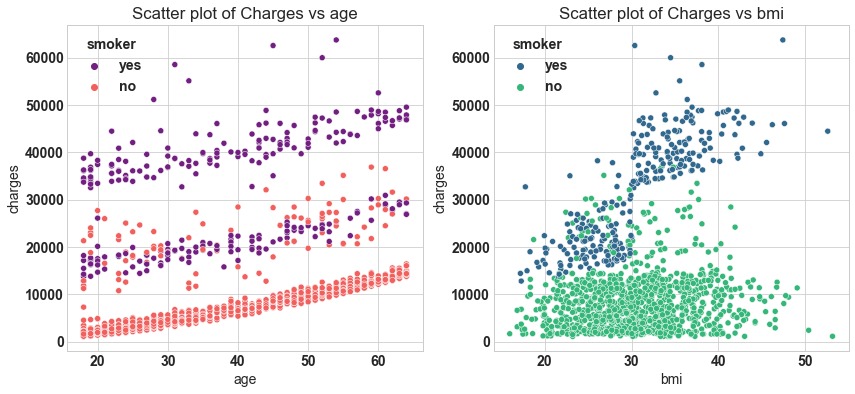

In [18]:
f = plt.figure(figsize = (14,6))
ax = f.add_subplot(121)
sns.scatterplot(x = 'age', y = 'charges', data = df, palette = 'magma', hue = 'smoker', ax = ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x = 'bmi', y = 'charges', data = df, palette = 'viridis', hue = 'smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png')

Dummy Variable

In [19]:
# Dummy variable
categorical_columns = ['sex', 'children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep = '_', 
                          columns = categorical_columns,
                          drop_first = True,
                          dtype = 'int8')

In [20]:
# lets verify the dummy variable process
print('Columns in original data frame: \n', df.columns.values)
print('\nNumber of rows and columns in the dataset: ', df.shape)
print('\nColumns in data frame after encoding dummy variable:\n', df_encode.columns.values)
print('\nNumber of rows and and columns in the dataset: ', df_encode.shape)

Columns in original data frame: 
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset:  (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and and columns in the dataset:  (1338, 13)


# Box Cox Transformation

In [21]:
from scipy.stats import boxcox
y_bc, lam, ci = boxcox(df_encode['charges'], alpha = 0.5)

ci, lam

((0.02469408300432109, 0.06261692025437948), 0.043649053770664956)

In [22]:
df_encode['charges'] = np.log(df_encode['charges'])

# Train Test Split

In [23]:
X = df_encode.drop('charges', axis = 1)
y = df_encode['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)

# Model Building

In [24]:
X_train_0.shape[1]

NameError: name 'X_train_0' is not defined

In [25]:
# Step 1: add x0 = 1 to dataset

X_train_0  = np.c_[np.ones((X_train.shape[0],1)), X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)), X_test]

# Step 2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T, X_train_0) ), np.matmul(X_train_0.T, y_train))

In [26]:
# The paramteres for linear regression model
parameter = ['theta_' + str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter': parameter, 'Columns' : columns, 'theta' : theta})

In [27]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


#Oarameter
sk_theta = [lin_reg.intercept_] + list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name = 'Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,7.059171,7.059171
1,theta_1,age,0.033134,0.033134
2,theta_2,bmi,0.013517,0.013517
3,theta_3,OHE_male,-0.067767,-0.067767
4,theta_4,OHE_1,0.149457,0.149457
5,theta_5,OHE_2,0.272919,0.272919
6,theta_6,OHE_3,0.244095,0.244095
7,theta_7,OHE_4,0.523339,0.523339
8,theta_8,OHE_5,0.466030,0.466030
9,theta_9,OHE_yes,1.550481,1.550481


In [28]:
np.matmul(X_test_0, theta)

array([ 9.32802713,  8.66515738, 10.34945923,  9.0857044 ,  8.40799106,
        8.98046205, 10.75033111,  8.56123513,  9.48629526, 10.95620982,
        8.12778368, 11.03779925,  8.1990367 ,  9.44519554,  8.8066528 ,
        8.53335756,  8.63349763,  8.11072376, 10.44179045, 10.44541581,
       11.20306161,  9.15884974,  8.86308192,  9.18807388, 10.58976028,
        8.5096746 ,  8.55315075,  9.61510538,  7.98408686,  9.1190357 ,
        9.38815905,  8.16725233,  8.40520457,  9.45110799,  8.77596203,
        9.8254051 ,  9.36925252,  9.02925783,  9.20804479,  8.38892968,
        9.19748104, 10.59511021,  9.19103022, 10.55946775,  9.26059492,
        9.29888161,  8.47160207,  8.55676594,  9.06500435,  8.69393464,
        9.41454054,  8.84711458,  9.13854193,  8.3013302 ,  8.44151321,
        9.3534316 ,  9.25814227,  9.16721408,  8.8229463 ,  9.61933393,
        9.95125969,  8.4934289 ,  7.90662691,  8.44124922,  8.13630424,
        8.62696136,  8.02643408,  7.94528507,  8.43110132,  9.45

In [51]:
# Normal equation
y_pred_norm = np.matmul(X_test_0, theta)

# Evaluation L MSE
J_mse = np.sum((y_pred_norm - y_test)**2) / X_test_0.shape[0]

# R_square
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The MSE or J(theta) is: ', J_mse)
print('R square obtain for normal equation method is : ', R_square)

The MSE or J(theta) is:  0.1872962232298182
R square obtain for normal equation method is :  0.7795687545055328


In [29]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test, y_test)
print('The Mean Square Error(MSE) or J(theta) is:', J_mse_sk)
print('R square obtain for sckit learn library is :', R_square_sk)

The Mean Square Error(MSE) or J(theta) is: 0.18729622322981887
R square obtain for sckit learn library is : 0.7795687545055319


C:\Users\darry\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\darry\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Check for Residual')

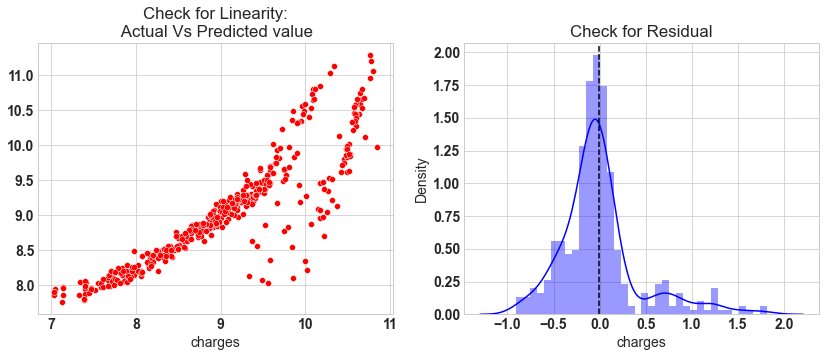

In [31]:
# Check for Linearity
f = plt.figure(figsize = (14,5) )
ax = f.add_subplot(121)
sns.scatterplot(y_test, y_pred_sk, ax = ax, color = 'r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')


# Check for Resiudeal normality and mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk), ax = ax, color = 'b')
ax.axvline((y_test - y_pred_sk).mean(), color = 'k', linestyle = '--')
ax.set_title('Check for Residual')

Text(0.5, 1.0, 'Check for Homoscedasticity: \nResidual Vs Predicted')

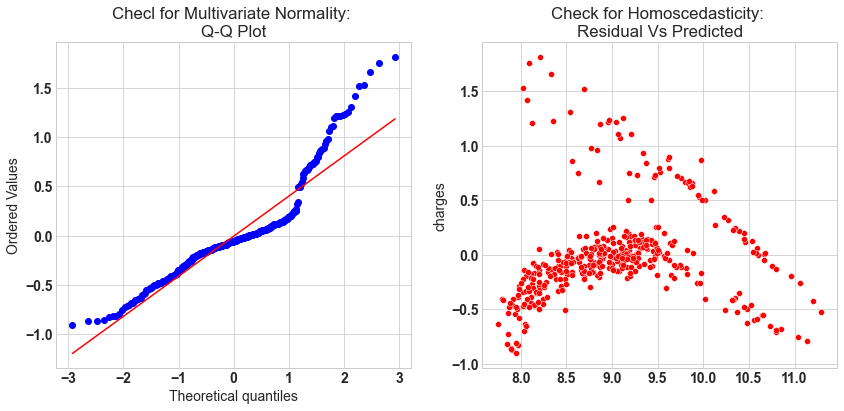

In [32]:
# Check for Multivariate Normality
# Quantile - Quantiel plot

f, ax = plt.subplots(1,2, figsize = (14,6))

import scipy as sp
_,(_, _, r) = sp.stats.probplot((y_test - y_pred_sk), fit = True, plot = ax[0])
ax[0].set_title('Checl for Multivariate Normality: \nQ-Q Plot')

# Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x = y_pred_sk, ax = ax[1], color = 'r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted')

In [33]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1 - R_square_sk)
VIF

4.536561945911138